In [0]:
import pandas as pd
import csv
import nltk
nltk.download("popular")
import io
from collections import Counter
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords

In [0]:
"""This code is used to import a file stored on a local system, 
   For example: in this program, a file namely 'Hotel Reviews Dataset.csv' is being uploaded through the local system and converted to a Pandas dataframe
"""
from google.colab import files
hotel = files.upload()
dataframe = pd.read_csv(io.BytesIO(hotel['Hotel Reviews Dataset.csv']), index_col='Hotel Name')

In [0]:
"""This part of the code is an alternate option of uploading the dataset by invoking the file from a gihub repository"""
url="https://raw.githubusercontent.com/Aditi2806/hotel_review_analysis/master/Hotel%20Reviews%20Dataset.csv"
dataframe=pd.read_csv(url,index_col="Hotel Name",encoding="utf-8")  

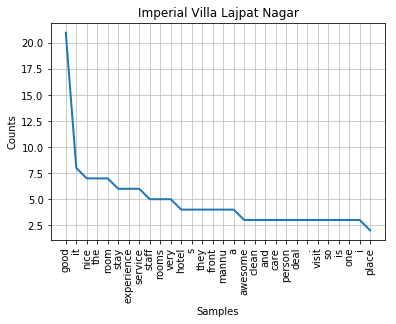

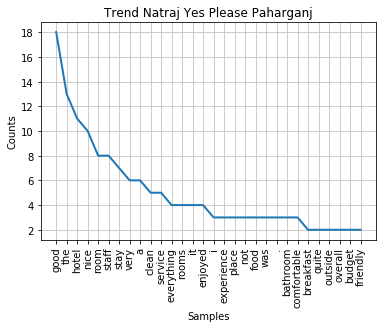

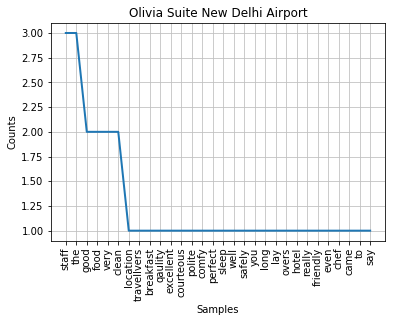

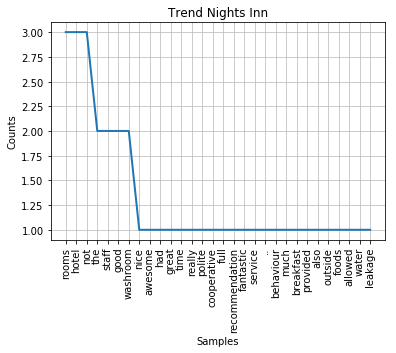

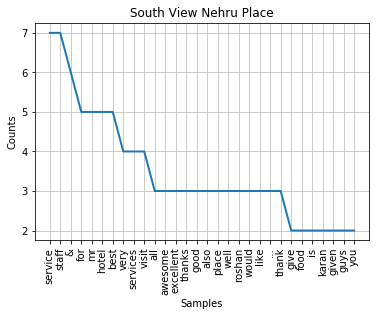

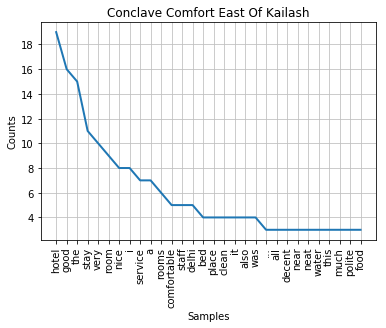

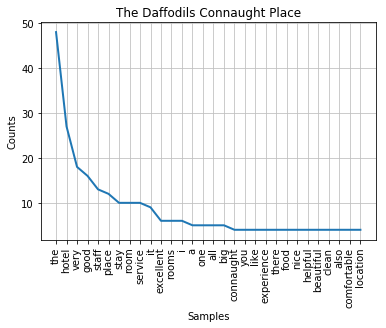

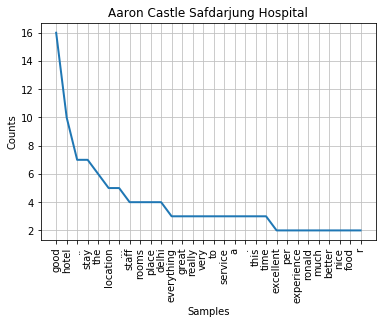

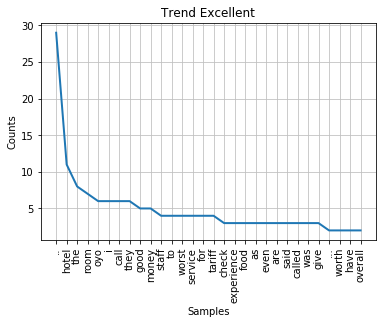

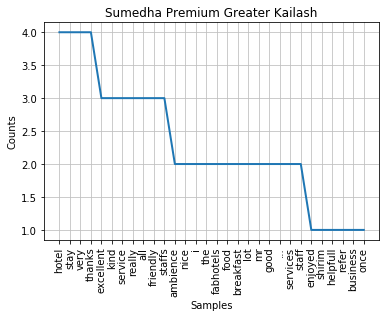

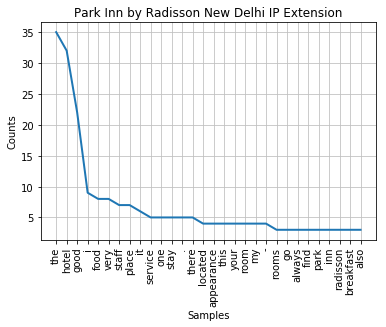

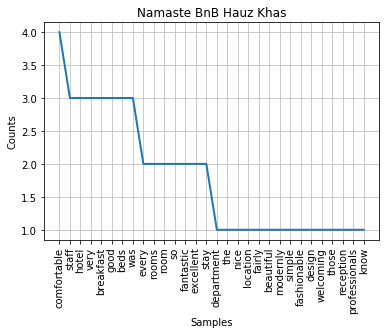

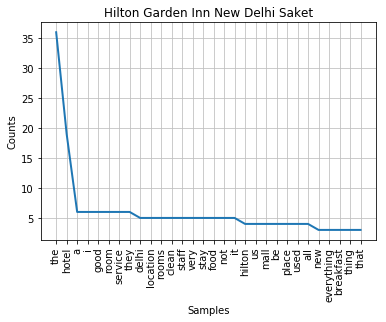

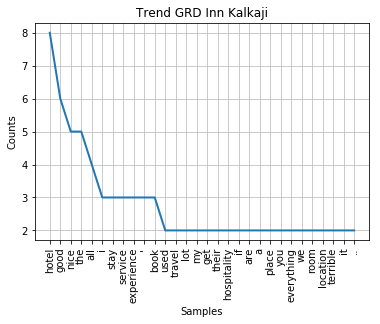

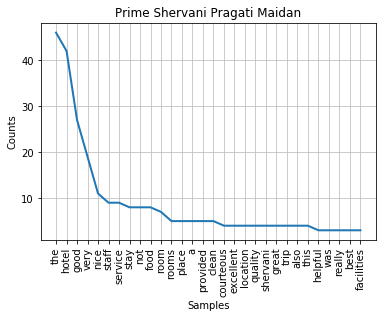

'\nstop_words=["i","the"," the","the ", "ourselves" , "hers", "between", "yourself", "but", "again", "there", "about", "once", "during", "out", "very", "having", "with", "they", "own", "an", "be", "some", "for", "do", "its", "yours", "such", "into", "of", "most", "itself", "other", "off", "is", "s", "am", "or", "who", "as", "from", "him", "each", "the", "themselves", "until", "below", "are", "we", "these", "your", "his", "through", "don", "nor", "me", "were", "her", "more", "himself", "this", "down", "should", "our", "their", "while", "above", "both", "up", "to", "ours", "had", "she", "all", "no", "when", "at", "any", "before", "them", "same", "and", "been", "have", "in", "will", "on", "does", "yourselves", "then", "that", "because", "what", "over", "why", "so", "can", "did", "not", "now", "under", "he", "you", "herself", "has", "just", "where", "too", "only", "myself", "which", "those", "i", "after", "few", "whom", "t", "being", "if", "theirs", "my", "against", "a", "by", "doing", "it

In [0]:
tokenizer=WordPunctTokenizer()                          #this creates a tokenizer to tokenize sentences according to puctuations and white spaces
hotel_name=set([i for i in dataframe.index])            #List to store the distinct hotel names

for i in hotel_name:                                    #Iterating through reviews of every hotel
    word_list=[]
    for j in dataframe['Review'][i]:
        token=tokenizer.tokenize(j.lower())
        for tokens in token:
            if (tokens in stopwords.words('english')) or (tokens in [",",".","'","``","''",";","?","--",")","(",":","!","\"","\'","/"]):
                token.remove(tokens)
        word_list = word_list+token
    frequency = nltk.FreqDist(word_list)
    #Visualizing the results obatined by plotting 30 most frequent words in the reviews of a hotel
    word_prob_words,_=zip(*(frequency.most_common(30)))
    word_prob_words=list(word_prob_words)
    frequency.plot(30,title=i)